<a href="https://colab.research.google.com/github/charudadhich/Iris-Classification-Project/blob/main/Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [52]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression

From seaborn load iris dataset in **iris** dataframe


In [53]:
iris = sb.load_dataset('iris')

In [54]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Return head of df

In [55]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Finding number or rows and columns in dataset

In [56]:
iris.shape

(150, 5)

Finding unique species

In [57]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [58]:
iris['species'].nunique()

3

**Data Visualization**

Scatter Plot

Text(0.5, 1.0, 'Scatter plot of sepal length and sepal width of iris dataset')

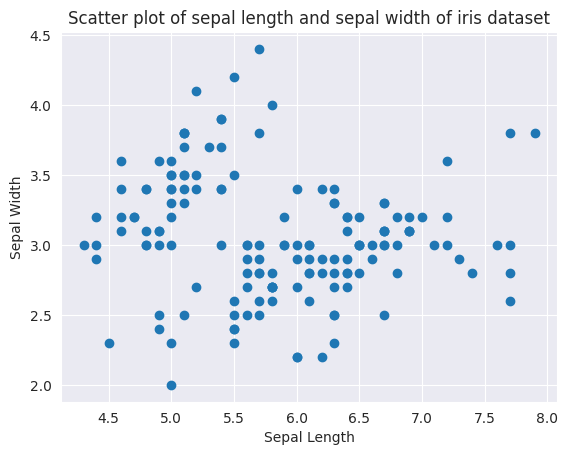

In [59]:
plt.scatter(iris['sepal_length'], iris['sepal_width'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter plot of sepal length and sepal width of iris dataset')

Text(0.5, 1.0, 'Scatter plot of petal length and petal width of iris dataset')

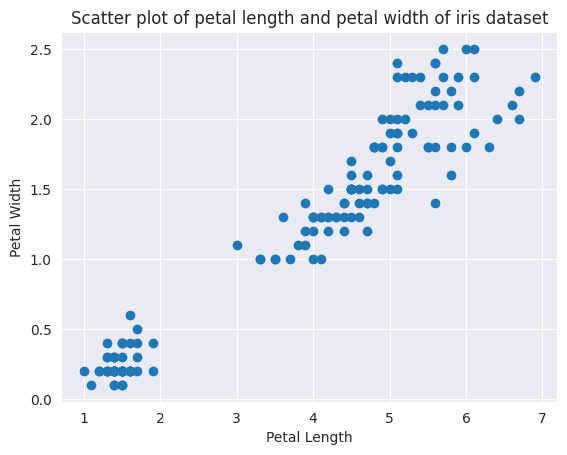

In [60]:
plt.scatter(iris['petal_length'], iris['petal_width'])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Scatter plot of petal length and petal width of iris dataset')

Setting style and adding colors to species for sepal length and sepal width

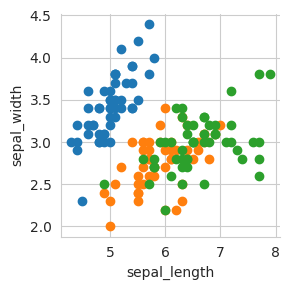

In [61]:
sb.set_style("whitegrid")
sb.FacetGrid(iris, hue="species") \
  .map(plt.scatter, "sepal_length", "sepal_width")
plt.show()

Changing grid and adding names to species

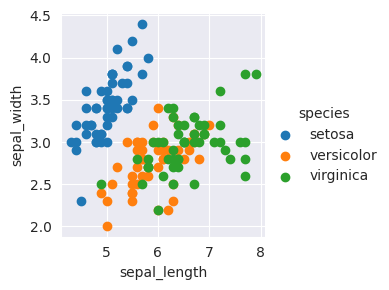

In [62]:
sb.set_style("darkgrid")
sb.FacetGrid(iris, hue="species") \
  .map(plt.scatter, "sepal_length", "sepal_width").add_legend()
plt.show()

Setting style and adding colors to species for petal length and petal width

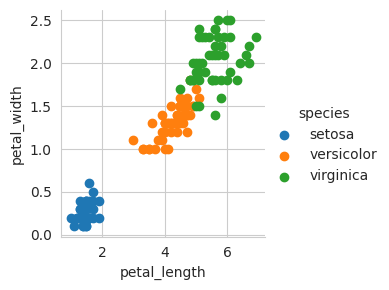

In [63]:
sb.set_style("whitegrid")
sb.FacetGrid(iris, hue="species") \
  .map(plt.scatter, "petal_length", "petal_width").add_legend()
plt.show()

Pair Plots

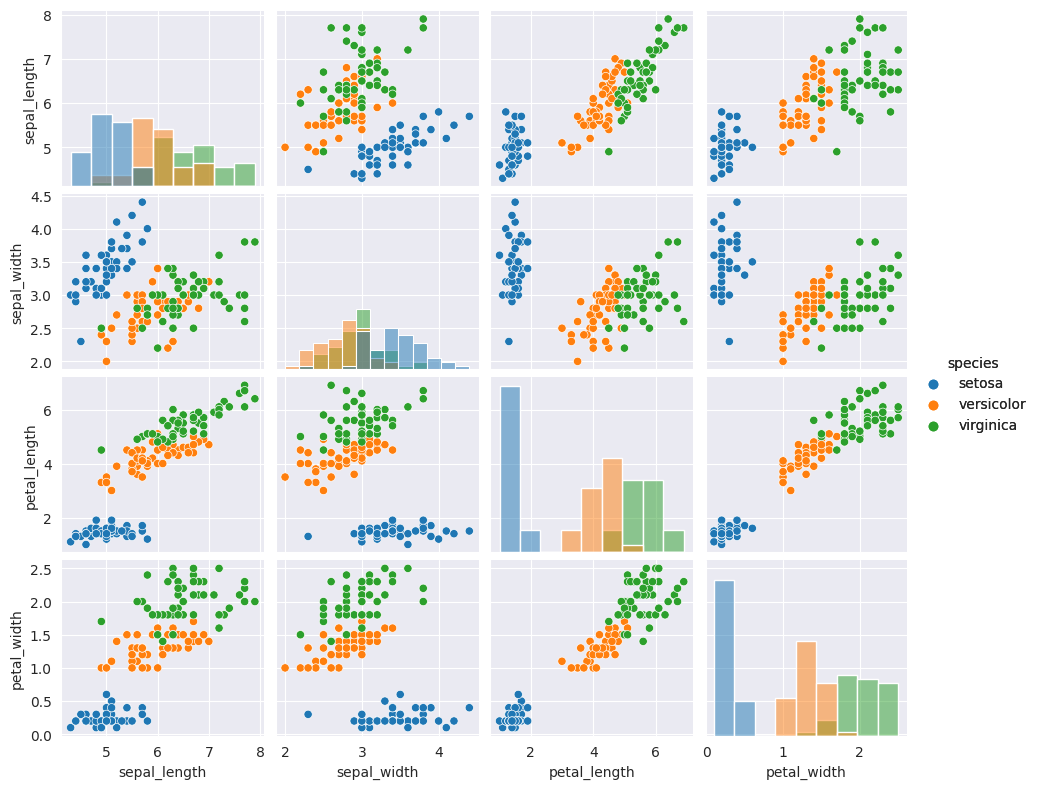

In [64]:
sb.set_style("darkgrid")
sb.pairplot(iris, hue = "species", height = 2, diag_kind="hist").add_legend()
plt.show()

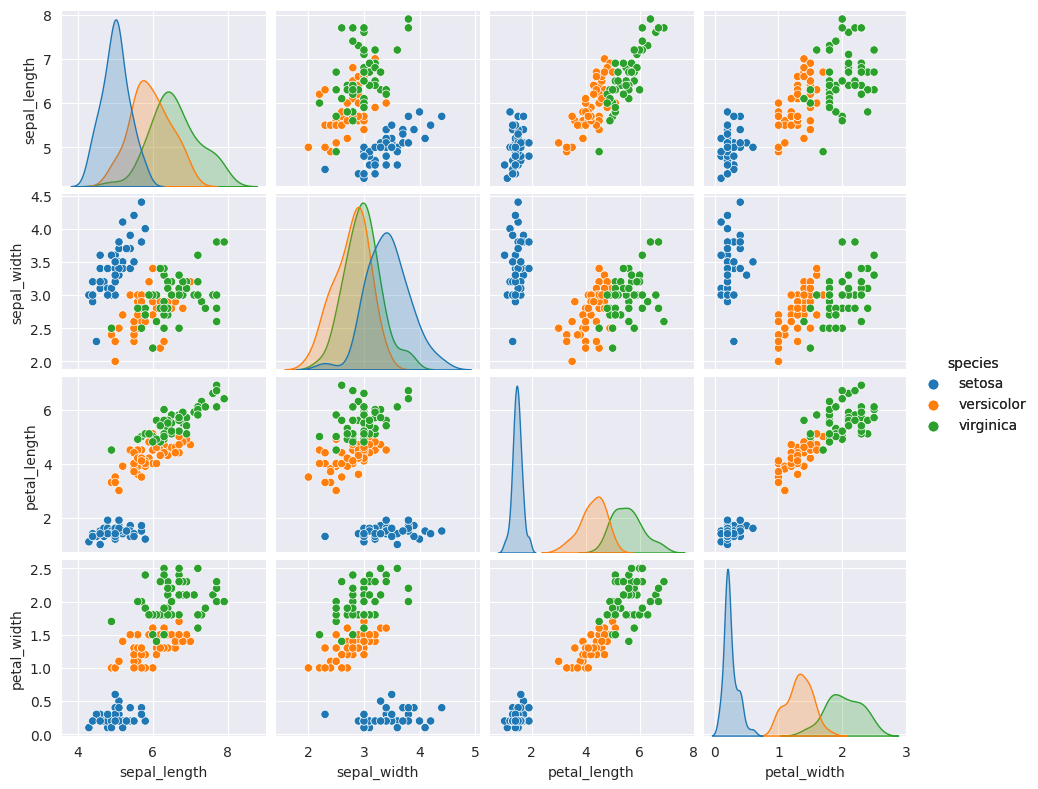

In [65]:
sb.set_style("darkgrid")
sb.pairplot(iris, hue = "species", height = 2).add_legend()
plt.show()

Box Plot for Sepal Length

<Axes: ylabel='sepal_length'>

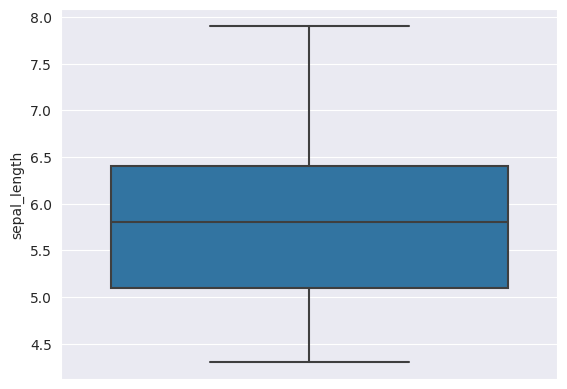

In [66]:
sb.boxplot(y="sepal_length", data=iris)

Box Plot for Sepal Length

<Axes: ylabel='petal_length'>

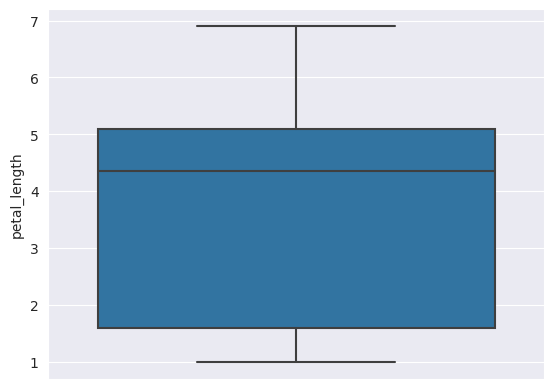

In [67]:
sb.boxplot(y="petal_length", data=iris)

Box Plot for different species wrt sepal length

<Axes: xlabel='species', ylabel='sepal_length'>

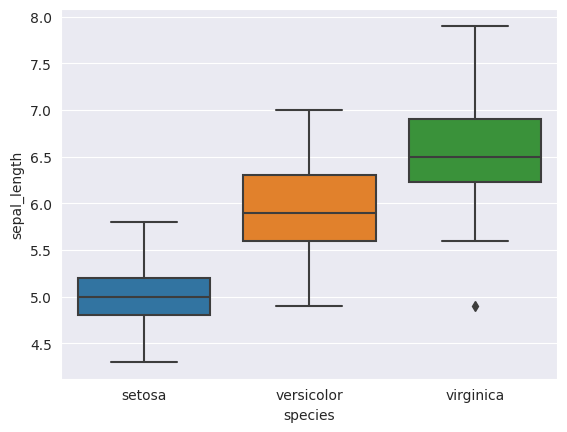

In [68]:
sb.boxplot(x='species', y='sepal_length', data=iris)

Kernel Distribution Estimate

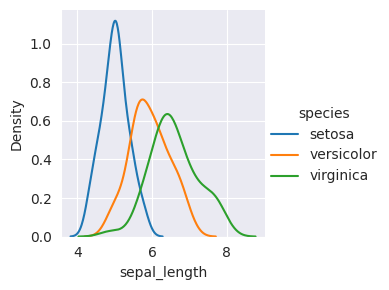

In [69]:
sb.FacetGrid(iris, hue="species", height=3) \
  .map(sb.kdeplot, "sepal_length").add_legend()
plt.show()

Line Plot


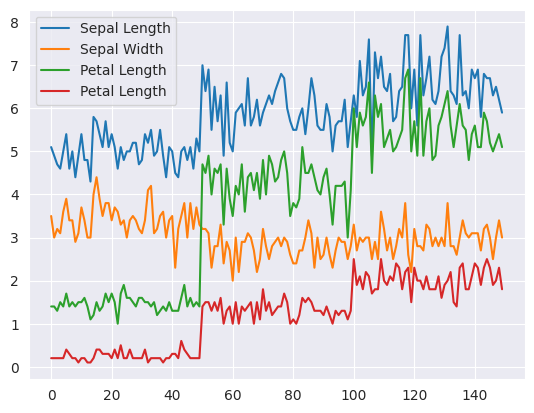

In [70]:
plt.plot(iris['sepal_length'], label = 'Sepal Length')
plt.plot(iris['sepal_width'], label = 'Sepal Width')
plt.plot(iris['petal_length'], label = 'Petal Length')
plt.plot(iris['petal_width'], label = 'Petal Length')
plt.legend()

In [71]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


Heatmap

<Axes: >

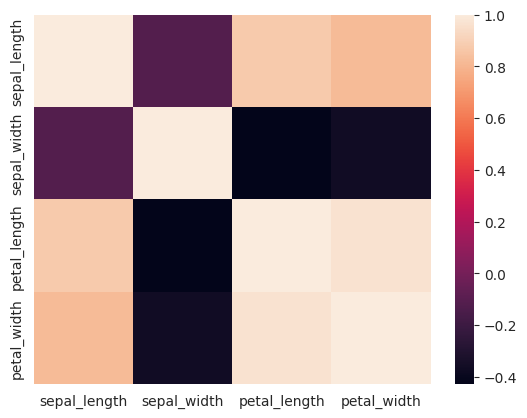

In [72]:
sb.heatmap(iris.corr())

Creating New dataframe

In [73]:
irisNew = iris.drop(['species'], axis = 1)

In [74]:
irisNew

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [75]:
x = irisNew
y = iris['species']

In [76]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [77]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Using train test split

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)

In [79]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

**Logistic Regression**

In [80]:
lr = LogisticRegression(solver = 'newton-cg')

In [81]:
lr.fit(x_train, y_train)

LogisticRegression(solver='newton-cg')

In [82]:
pred_y = lr.predict(x_test)

Confusion Matrix

In [83]:
confusion_matrix(y_test, pred_y)

array([[24,  0,  0],
       [ 0, 12,  1],
       [ 0,  4, 19]])

Text(0.5, 23.52222222222222, 'Predicted Value')

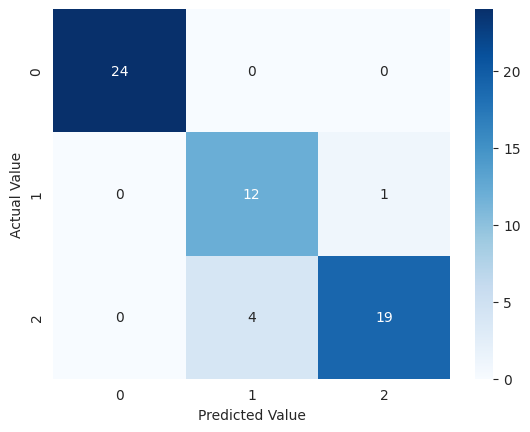

In [84]:
sb.heatmap(data = confusion_matrix(y_test, pred_y), annot=True, cmap = "Blues")
plt.ylabel("Actual Value")
plt.xlabel("Predicted Value")

Get score for Logistic regression

In [85]:
Logistic_Reg_score = accuracy_score(y_test, pred_y)

In [86]:
Logistic_Reg_score

0.9166666666666666

**Decision Tree**

In [87]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [88]:
pred_y_dtree = dtree.predict(x_test) 

In [89]:
confusion_matrix(y_test, pred_y_dtree)

array([[24,  0,  0],
       [ 0, 12,  1],
       [ 0,  3, 20]])

Text(0.5, 23.52222222222222, 'Predicted Value')

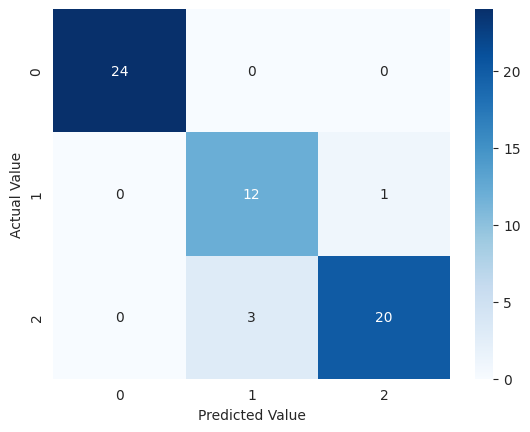

In [90]:
sb.heatmap(data = confusion_matrix(y_test, pred_y_dtree), annot=True, cmap = "Blues")
plt.ylabel("Actual Value")
plt.xlabel("Predicted Value")

In [91]:
dtree_score = accuracy_score(y_test, pred_y_dtree)
dtree_score

0.9333333333333333

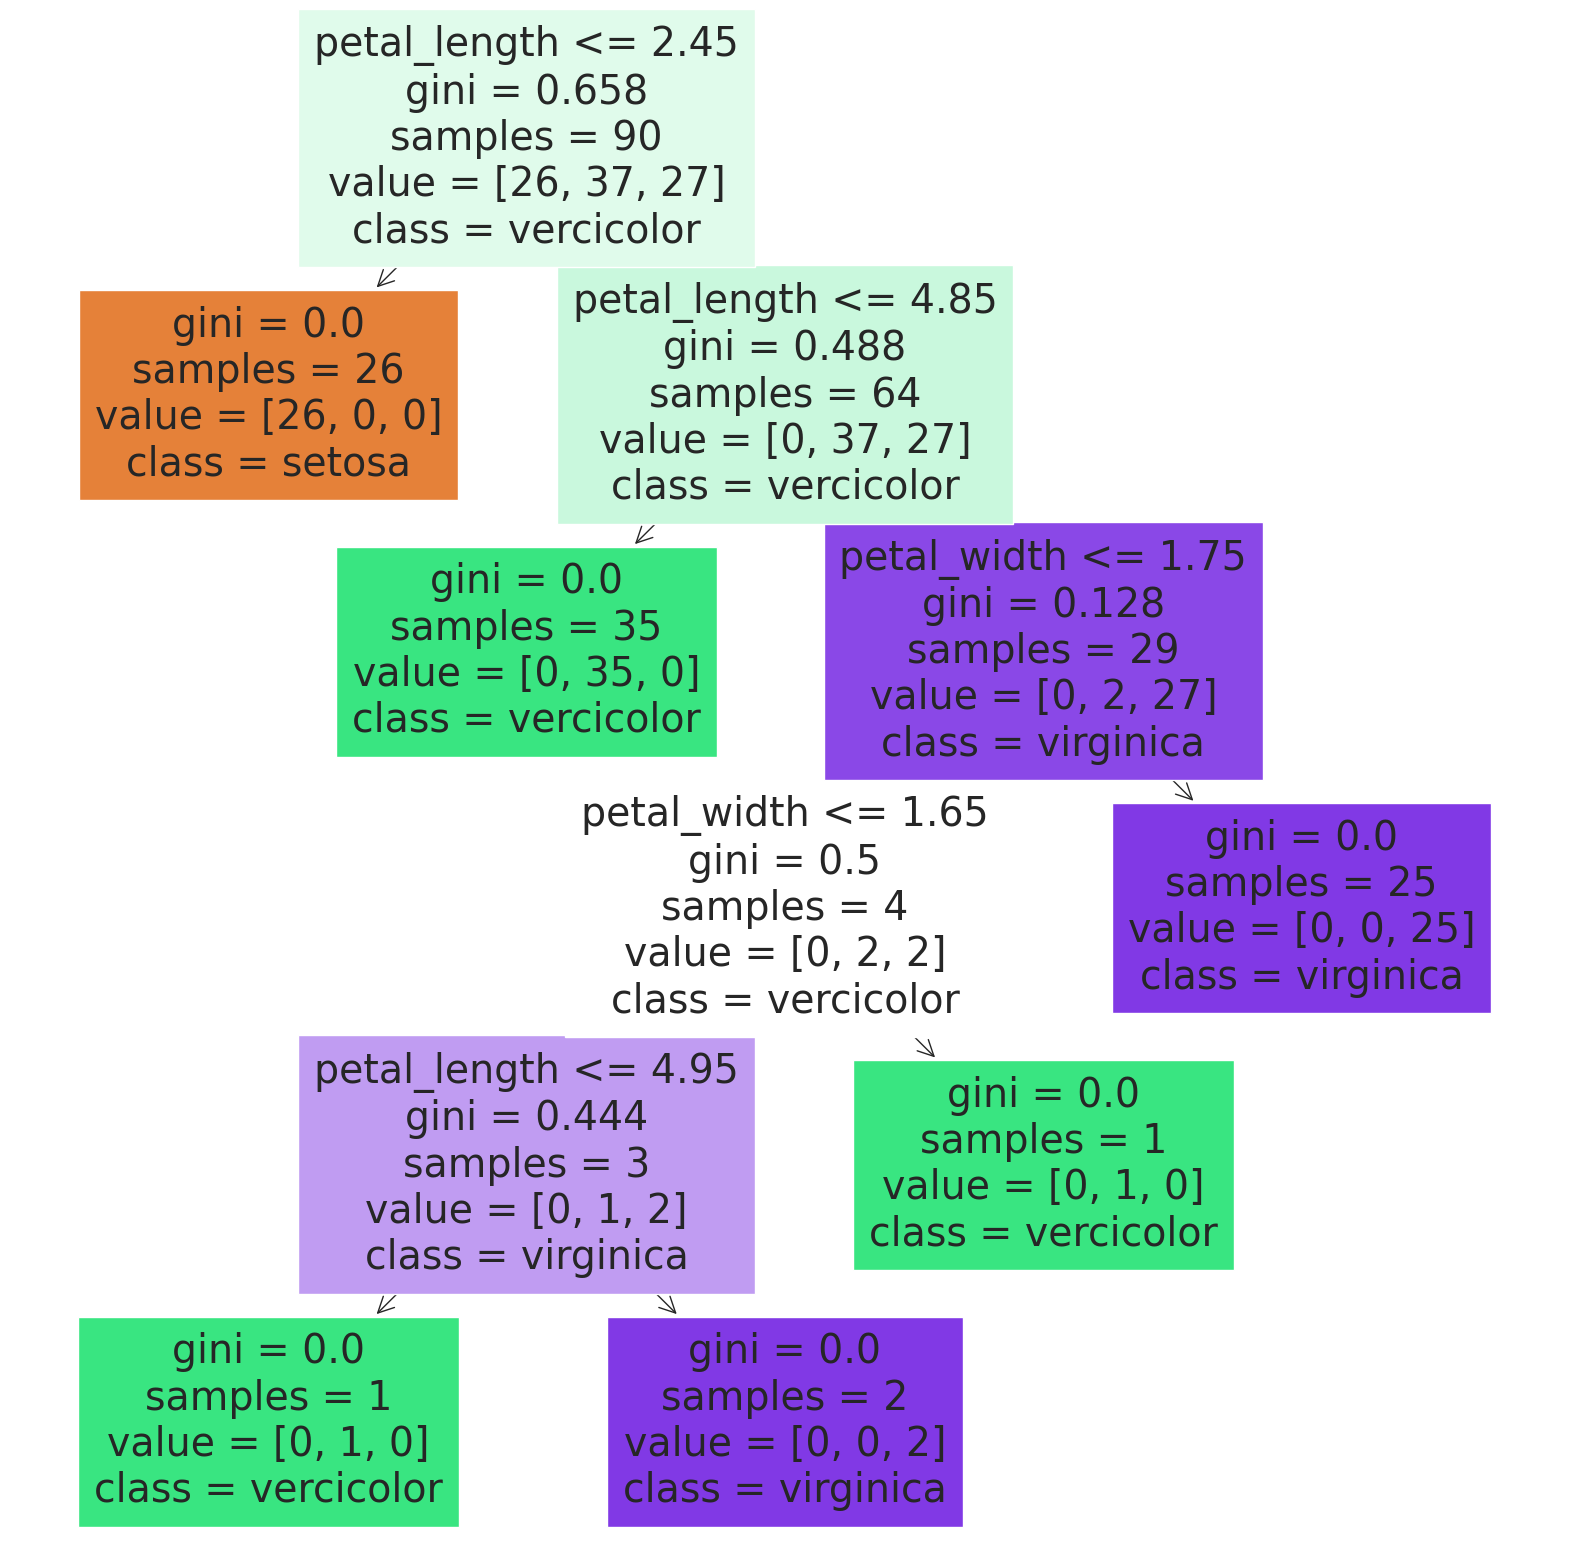

In [92]:
plt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree = dtree, feature_names = iris.columns[:-1], 
                     class_names = ['setosa', 'vercicolor', 'virginica'], filled=True)

**Random Forest**

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
rdf = RandomForestClassifier(n_estimators = 100)

In [95]:
rdf.fit(x_train, y_train)

RandomForestClassifier()

In [96]:
pred_y_rdf = rdf.predict(x_test)

In [97]:
confusion_matrix(y_test, pred_y_rdf)

array([[24,  0,  0],
       [ 0, 12,  1],
       [ 0,  3, 20]])

Text(0.5, 23.52222222222222, 'Predicted Value')

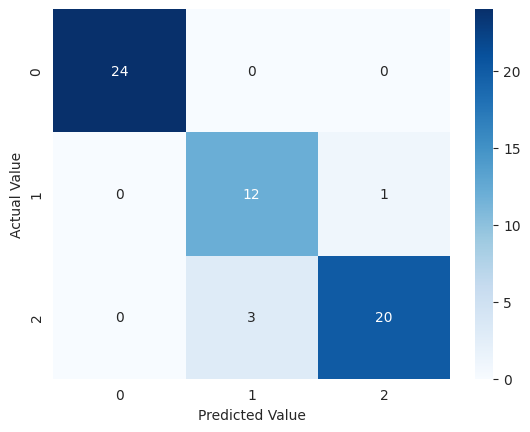

In [98]:
sb.heatmap(data = confusion_matrix(y_test, pred_y_rdf), annot=True, cmap = "Blues")
plt.ylabel("Actual Value")
plt.xlabel("Predicted Value")

In [99]:
Random_forest_score = accuracy_score(y_test, pred_y_rdf)
Random_forest_score

0.9333333333333333

In [100]:
print("Logistic Regression Score:", Logistic_Reg_score)
print("Decision Tree Score:", dtree_score)
print("Random Forest Score:", Random_forest_score)

Logistic Regression Score: 0.9166666666666666
Decision Tree Score: 0.9333333333333333
Random Forest Score: 0.9333333333333333
